# Predicting Coffee Grade

## Feature Engineering & Pre Processing

## Table of Contents
* [1. Combining Variables](#combining_variables)   
    * [1.1 Combining Countries with less than 9 values into "Other" category](#combining_countries) 
    * [1.2 Combining Varieties with less than 8 values into "Other" category](#combining_varieties)
    * [1.3 Combining Exchange and Standard Grade Coffee Grades into "Grade 3 or Lower" category](#combining_exchange)
* [2. Feature Selection](#feature_selection)
* [3. One Hot Encoding](#one_hot_encoding)
* [4. Saving the Relevant Data Frames](#save)

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
coffee2 = pd.read_csv('../data/coffee2.csv')

<a class="anchor" id="combining_variables"></a>
## 1. Combining Variables

Because of our small dataset, we will combine our categories with the fewest values into one lumped category for our Countries, Varieties, and Coffee Grade features. This will improve the modeling process and help prevent over/under fitting of the test data.

<a class="anchor" id="combining_countries"></a>
### 1.1 Combining Countries with less than 9 values into "Other" category

In [4]:
#lump all countries that we have less than 5 graded coffees for into an Others category

a = coffee2['Country of Origin'].value_counts() < 9
b = coffee2['Country of Origin'].value_counts()
for i in range(len(a.index)):
    if(a[i]):
        coffee2.loc[coffee2["Country of Origin"] == a.index[i], "Country of Origin"] = "Other"

In [5]:
coffee2["Country of Origin"].value_counts()

Other         54
Guatemala     36
Brazil        21
Colombia      17
Ethiopia      12
Costa Rica    10
Name: Country of Origin, dtype: int64

<a class="anchor" id="combining_varieties"></a>
### 1.2 Combining Varieties with less than 8 values into "Other" category

In [6]:
a = coffee2['Variety'].value_counts() <= 7
b = coffee2['Variety'].value_counts()
for i in range(len(a.index)):
    if(a[i]):
        coffee2.loc[coffee2["Variety"] == a.index[i], "Variety"] = "Other"

In [7]:
coffee2.Variety.value_counts()

Other      55
Caturra    41
Bourbon    32
Catuai     12
SL28       10
Name: Variety, dtype: int64

<a class="anchor" id="combining_exchange"></a>
### 1.3 Combining Exchange and Standard Grade Coffee Grades into "Grade 3 or Lower" category

In [10]:
coffee2.Coffee_Grade.value_counts()

Premium           79
Specialty         58
Exchange           9
Standard Grade     4
Name: Coffee_Grade, dtype: int64

In [12]:
coffee2['Coffee_Grade'] = coffee2['Coffee_Grade'].str.replace('Standard Grade', 'Grade 3 or Lower')
coffee2['Coffee_Grade'] = coffee2['Coffee_Grade'].str.replace('Exchange', 'Grade 3 or Lower')

Let's look at our new value counts for our target variable, Coffee_Grade

In [14]:
coffee2.Coffee_Grade.value_counts()

Premium             79
Specialty           58
Grade 3 or Lower    13
Name: Coffee_Grade, dtype: int64

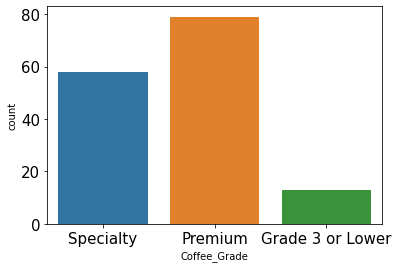

In [16]:
ax = sns.countplot(x="Coffee_Grade", data=coffee2)
ax.tick_params(labelsize=15)

Now our target feature has 3 categories with the following value counts: 
   
   * Premium - 79
   * Specialty - 58
   * Grade 3 or Lower - 13
    
Even with this lumping, our dataset is highly unbalanced and that will be taken into consideration while modeling and analyzing results.

<a class="anchor" id="feature_selection"></a>
## 2. Feature Selection

In [17]:
coffee2.columns

Index(['Unnamed: 0', 'Country of Origin', 'Variety', 'Mean Altitude (m)',
       'Harvest Year', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Total Cup Points', 'Moisture', 'Color', 'Quakers',
       'Total_Defects', 'Coffee_Grade'],
      dtype='object')

Because our problem requires us to predict coffee grade without having already graded it for defects, quakers, and all other graded criteria, we will create a new data frame without these features. The useful features we will include are Country of Origin, Variety, Mean Altitude (m), Harvest Year, Processing Method, Moisture,
Color, and our target variable, Coffee Grade.

In [18]:
#create new df without all the grading categories. We will keep Total Cup Points which is the sum of these categories.
coffee3 = coffee2[['Country of Origin','Variety','Mean Altitude (m)','Harvest Year','Processing Method','Moisture','Color','Coffee_Grade']]

In [19]:
#make sure there are no Nan data
coffee3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country of Origin  150 non-null    object 
 1   Variety            150 non-null    object 
 2   Mean Altitude (m)  150 non-null    float64
 3   Harvest Year       150 non-null    int64  
 4   Processing Method  150 non-null    object 
 5   Moisture           150 non-null    float64
 6   Color              150 non-null    object 
 7   Coffee_Grade       150 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 9.5+ KB


In [20]:
coffee3.head()

,Country of Origin,Variety,Mean Altitude (m),Harvest Year,Processing Method,Moisture,Color,Coffee_Grade
0,Other,Other,1200.0,2020,Natural / Dry,11.0,None,Specialty
1,Other,SL28,1650.0,2019,Washed / Wet,11.0,Green,Specialty
2,Colombia,Other,1800.0,2021,Washed / Wet,11.0,Green,Specialty
3,Ethiopia,Other,2219.0,2020,Other,11.0,Green,Premium
4,Colombia,Other,1650.0,2019,Pulped natural / honey,11.0,None,Specialty


<a class="anchor" id="one_hot_encoding"></a>
## 3. One Hot Encoding

Lastly we will make our final data frame by one-hot-encoding our categorical features. This will allow us to run our models on the data. We will also drop our target feature, Coffee_Grade here and save this new df (which will be our X matrix for training and testing) as coffee4.

In [21]:
coffee4 = coffee3.drop(['Coffee_Grade'], axis=1)
coffee4 = pd.get_dummies(coffee4)

In [23]:
coffee4.head()

,Mean Altitude (m),Harvest Year,Moisture,Country of Origin_Brazil,Country of Origin_Colombia,Country of Origin_Costa Rica,Country of Origin_Ethiopia,Country of Origin_Guatemala,Country of Origin_Other,Variety_Bourbon,...,Variety_SL28,Processing Method_Natural / Dry,Processing Method_Other,Processing Method_Pulped natural / honey,Processing Method_Washed / Wet,Color_Blue-Green,Color_Green,Color_Greenish,Color_None,Color_Yellow-Green
0,1200.0,2020,11.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1650.0,2019,11.0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,1800.0,2021,11.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2219.0,2020,11.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1650.0,2019,11.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


<a class="anchor" id="save"></a>
## 4. Save the Relevant Data Frames

In [25]:
coffee3.to_csv('../data/coffee3.csv')

In [27]:
coffee4.to_csv('../data/coffee4.csv')